In [1]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, multilabel_confusion_matrix, precision_recall_fscore_support, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_det_curve

In [3]:
refugee = pd.read_csv('4milrefugee_range_final_dataset.csv', index_col=0)

In [4]:
df = refugee.copy()

In [5]:
df['mandatory_contribution_range'].value_counts()

£1250 and lower       2927842
£8432 to £16864        372837
£1488 to £6448         280140
£16864 to £33728       222282
£6488 to £8432         126490
£33728 to £58776        47121
£1488                   11227
£58776 to £75640         6577
£92504 and greater       3274
£75640 to £92504         2210
Name: mandatory_contribution_range, dtype: int64

In [6]:
target_variable = 'mandatory_contribution_range'
encode_variable = ['language', 'education_level', 'last_occupation']

In [7]:
for col in encode_variable:
    dummy_data = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_data], axis=1)
    del df[col]

In [8]:
mapping_target = {'£1250 and lower':0, '£1488':1, '£1488 to £6448':2, '£6488 to £8432':3, '£8432 to £16864':4, '£16864 to £33728':5, '£33728 to £58776':6, '£58776 to £75640':7, '£75640 to £92504':8, '£92504 and greater':9}
def encoded_target(val):
    return mapping_target[val]

In [9]:
df['mandatory_contribution_range'] = df['mandatory_contribution_range'].apply(encoded_target)

In [10]:
X = df.drop('mandatory_contribution_range', axis=1)
y = df['mandatory_contribution_range']

In [11]:
#the y values does not count all the elements and leaves out element number 8. why?

In [12]:
y.value_counts()

0    2927842
4     372837
2     280140
5     222282
3     126490
6      47121
1      11227
7       6577
9       3274
8       2210
Name: mandatory_contribution_range, dtype: int64

<AxesSubplot:ylabel='mandatory_contribution_range'>

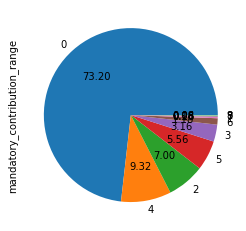

In [13]:
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#rand_over_sampler = RandomOverSampler(sampling_strategy =1)#float
rand_over_sampler = RandomOverSampler(sampling_strategy = "not majority") #string
X_resampled, y_resampled = rand_over_sampler.fit_resample(X, y)

ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("OverSampled")

In [ ]:
y_resampled.value_counts()

In [ ]:
#Used regression model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
# Training the model 
regressor.fit (X_resampled, y_resampled)

In [ ]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_resampled)

In [ ]:
from sklearn import metrics

In [ ]:
error_score = metrics.r2_score(y_resampled,test_data_prediction)
print ("R Squarred Error : ", error_score)

In [ ]:
y_resampled = list (y_resampled)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
plt.plot(y_resampled, color ='blue', label='Actual Value')
plt.plot(test_data_prediction, color ='green',label='Predicted Values')
plt.title ('Actual VS Predicted Contribtuion Range')
plt.xlabel('Number of values')
plt.ylabel('Contribution Range')
plt.legend()
plt.show()

In [ ]:
plt.plot(y_resampled, color ='blue', label='Actual Value')


In [ ]:
plt.plot(test_data_prediction, color ='green',label='Predicted Values')

In [ ]:
#This is best till now

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)

In [ ]:
y_pred = rfc.predict(X_resampled)
accuracy_score(y_resampled,y_pred)

In [ ]:
print(classification_report(y_resampled,y_pred))

In [ ]:
y_resampled = list (y_resampled)

In [ ]:
plt.plot(y_resampled, color ='blue', label='Actual Value')
plt.plot(y_pred, color ='green',label='Predicted Values')
plt.title ('Actual VS Predicted Contribtuion Range')
plt.xlabel('Number of values')
plt.ylabel('Contribution Range')
plt.legend()
plt.show()

In [ ]:
plt.plot(y_resampled, color ='blue', label='Actual Value')

In [ ]:
import joblib
range_model = "range_final_model.pkl"
joblib.dump(rfc, range_model)

In [ ]:
params={
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200, 300, 400, 500],
    'max_features': [1,2,3],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'min_samples_leaf': [1,2,3,4],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rfc, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3, random_state=51)
random_search.fit(X_resampled, y_resampled)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=1, min_samples_leaf=3, n_estimators=200)
rfc.fit(X_resampled, y_resampled)

In [ ]:
y_pred = rfc.predict(X_resampled)
accuracy_score(y_resampled,y_pred)

In [ ]:
print(classification_report(y_resampled,y_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
MLP.fit(X_resampled, y_resampled.values.ravel())

In [ ]:
prediction = MLP.predict(X_resampled)

In [ ]:
accuracy_score(y_resampled,prediction)

In [ ]:
print(classification_report(y_resampled,y_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
MLP.fit(X_resampled, y_resampled)

In [ ]:
prediction = MLP.predict(X_resampled)

In [ ]:
accuracy_score(y_resampled,prediction)

In [ ]:
print(classification_report(y_resampled,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, y)

In [ ]:
y_pred = rfc.predict(X)
accuracy_score(y,y_pred)

In [ ]:
print(classification_report(y,y_pred))

In [ ]:
#GrdaientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Iniciating the model

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)

In [ ]:
#Fitting and Training the model 

In [ ]:
gbc.fit(X_resampled, y_resampled)

In [ ]:
#Checking the accuracy

In [ ]:
y_pred = gbc.predict(X_resampled)

In [ ]:
#Classification metrics to evaluate the model

In [ ]:
#Using the built in accuracy score:
gbc.score(X_resampled, y_resampled)

In [ ]:
#Using SKlearn:
accuracy_score(y_resampled, y_pred)

In [ ]:
#Baseline accuracy score

In [ ]:
print(classification_report(y_resampled,y_pred))

In [ ]:
#did not work, delete!

In [ ]:
#GradBoosting

In [ ]:
%pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_resampled,label=y_resampled)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
y_resampled.xgboost.XGBClassifier


In [ ]:
estimator = df.xgboost.XGBClassifier()

In [ ]:
X_resampled.fit(estimator)
XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='multi:softprob', seed=0,
       silent=True, subsample=1)

In [ ]:
predicted = test_df.predict(estimator)

In [ ]:
test_df.metrics.confusion_matrix()

In [ ]:
pip install hyperopt

In [ ]:
#SVM and bagging?---->

In [ ]:
#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [ ]:
#Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#rand_over_sampler = RandomOverSampler(sampling_strategy =1)#float
rand_over_sampler = RandomOverSampler(sampling_strategy = "not majority") #string
X_resampled, y_resampled = rand_over_sampler.fit_resample(X, y)

ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("OverSampled")

In [ ]:
#Standardizing

In [ ]:
sc = StandardScaler()
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_transformed = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train_transformed.describe().T

In [ ]:
X_train.describe().T

In [ ]:
#Baseline SVM model and score

In [ ]:
#Checking for the default/baseline parameters
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

In [ ]:
#Baseline model implementation
svc.fit(X_train_transformed, y_train)
#Accuracy Score
print(f'The Accuracy Score of the baseline model is {svc.score(X_test_transformed, y_test):.4f}')

In [ ]:
#Using GridSearch for tuning the hyperparameters

In [ ]:
#List of C values
C_range = np.logspace(-1,1,3)
print(f'The list of values for C are {C_range}')

#List of gamma values
gamma_range = np.logspace(-1,1,3)
print(f'The list of values for gamma are {gamma_range}')


In [ ]:
#Cross Validation
#Defining the search space
prama_grid = {
    #Regularization of the parameter
    "C": C_range,
    #Kernel type
    "kernel": ['rbf', 'poly'],
    #Gamma is the Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    "gamma": gamma_range.tolist()+['scale', 'auto']
}

#Setting the scoring metrics
scoring = ['accuracy']

#Setting up the k-fold cross-val
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
#Using Grid Search
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1,
    cv=kfold,
    verbose=0
)

#Fitting grid Search
grid_result = grid_search.fit(X_train_transformed, y_train)

#Printing grid search summary
grid_result

In [ ]:
#Printing the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
#Printing the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
#Printing the best accuracy score for the testng dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test_transformed, y_test):.4f}')

In [ ]:
#Using Random Search for tuning the hyperparameter
#List of C values
C_range = np.logspace(-10,10,21)
print(f'The list of values for C are {C_range}')
#Listing the gamma values
gamma_range = np.logspace(-10,10,20)
print(f'The list of values for gamma are {gamma_range}')

In [ ]:
#efining the search space
param_grid = {
    #Parameter Regularization
    "C": C_range,
    #Type of the kernel
    "kernel": ['rbf', 'poly'],
    #Gamma is the kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    "gamma": gamma_range.tolist()+['sclare', 'auto']
}

#setting up the scoring metrics
scoring = ['accuracy']
#Setting up the kFold cross val
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#Defining random search
random_search = RandomizedSearchCV(
    estimator = svc,
    param_distributions=param_grid,
    n_iter=100,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1,
    cv=kfold,
    verbose=0
)

#Fitting grid search
random_result = random_search.fit(X_train_transformed, y_train)

#Printting summary of the grid search 
random_result

In [ ]:
#Printing the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {random_result.best_score_:.4f}')
#Printing the hyperparameters for the best score
print(f'The best hyperparameters are {random_result.best_params_}')
#Printing the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {random_search.score(X_test_transformed, y_test):.4f}')

In [ ]:
#Using Bayesian Optimization for hyperparameter Tuning
#Defining the space
Space = {
    'C'  : hp.choice('C', C_range),
    'gamma' : hp.choice('gamma', gamma_range.tolist()+['scale', 'auto']),
    'kernel' : hp.choice('kernal', ['rbf', 'poly'])

}

#Setting up the k-fold cross-val
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#Objective function
def objective(params):
    
    svc = SCV(**params)
    scores = cross_val_score(svc, x_train_transformed, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    
    #Extracting the best score
    best_score = max(scores)
    
    #Minimizing Loss
    loss = - best_score
    
    #Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

#Using Trials to track progress
bayes_trails = Trails()

#Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trails = bayes_trails)

In [ ]:
#Printing the index of the best parameters
print(best)

#Printing the values of the best parameters
print(space_eval(space, best))

In [ ]:
# Training the model using the best parameters
svc_bo = SVC(C=space_eval(space, best)['C'], gamma=space_eval(space, best)['gamma'], kernel=space_eval(space, best)['kernel']).fit(X_train_transformed,y_train)
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {svc_bo.score(X_test_transformed, y_test):.4f}')